<a href="https://colab.research.google.com/github/databeingmagic/covid_co/blob/main/Covid19_V1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup Notebook

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
sns.set(color_codes=True)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).




# Data Loading

Please, find the metadata described [here](https://www.datos.gov.co/Salud-y-Protecci-n-Social/Casos-positivos-de-COVID-19-en-Colombia/gt2j-8ykr)

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/COVID-CO/Casos_positivos_de_COVID-19_en_Colombia_fallecidos.csv')
df.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,20/3/2020 0:00:00,152,18/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,65,1,M,Importado,Fallecido,Fallecido,840.0,ESTADOS UNIDOS DE AMÉRICA,Fallecido,10/3/2020 0:00:00,5/4/2020 0:00:00,20/3/2020 0:00:00,NaN,NaN,6.0,NaN
1,20/3/2020 0:00:00,153,18/3/2020 0:00:00,11,BOGOTA,11001,BOGOTA,53,1,F,Relacionado,Fallecido,Fallecido,NaN,NaN,Fallecido,18/3/2020 0:00:00,6/4/2020 0:00:00,20/3/2020 0:00:00,NaN,NaN,6.0,NaN
2,20/3/2020 0:00:00,157,20/3/2020 0:00:00,47001,STA MARTA D.E.,47001,SANTA MARTA,88,1,M,Relacionado,Fallecido,Fallecido,NaN,NaN,Fallecido,12/3/2020 0:00:00,23/3/2020 0:00:00,20/3/2020 0:00:00,NaN,NaN,6.0,NaN
3,21/3/2020 0:00:00,188,17/3/2020 0:00:00,76,VALLE,76892,YUMBO,70,1,F,Relacionado,Fallecido,Fallecido,NaN,NaN,Fallecido,8/3/2020 0:00:00,22/3/2020 0:00:00,21/3/2020 0:00:00,NaN,NaN,6.0,NaN
4,16/3/2020 0:00:00,197,13/3/2020 0:00:00,13001,CARTAGENA,13001,CARTAGENA,58,1,M,Relacionado,Fallecido,Fallecido,NaN,NaN,Fallecido,6/3/2020 0:00:00,16/3/2020 0:00:00,16/3/2020 0:00:00,NaN,NaN,6.0,NaN


In [ ]:
# Check the type for each column
df.dtypes
# Action: Data fields must be formated as date

fecha reporte web                object
ID de caso                        int64
Fecha de notificación            object
Código DIVIPOLA departamento      int64
Nombre departamento              object
Código DIVIPOLA municipio         int64
Nombre municipio                 object
Edad                              int64
Unidad de medida de edad          int64
Sexo                             object
Tipo de contagio                 object
Ubicación del caso               object
Estado                           object
Código ISO del país             float64
Nombre del país                  object
Recuperado                       object
Fecha de inicio de síntomas      object
Fecha de muerte                  object
Fecha de diagnóstico             object
Fecha de recuperación           float64
Tipo de recuperación            float64
Pertenencia étnica              float64
Nombre del grupo étnico          object
dtype: object

# Data cleaning

In [ ]:
#Changing date fields as DateTime, dayfirst reads the date in the format DD/MM/YYYY
df["fecha reporte web"]= pd.to_datetime(df["fecha reporte web"], dayfirst=True)
df["Fecha de notificación"]= pd.to_datetime(df["Fecha de notificación"], dayfirst=True)
df["Fecha de inicio de síntomas"]= pd.to_datetime(df["Fecha de inicio de síntomas"], dayfirst=True)
df["Fecha de muerte"]= pd.to_datetime(df["Fecha de muerte"], dayfirst=True)
df["Fecha de diagnóstico"]= pd.to_datetime(df["Fecha de diagnóstico"], dayfirst=True)
df["Fecha de recuperación"]= pd.to_datetime(df["Fecha de recuperación"], dayfirst=True)

df.head(5)

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,2020-03-20,152,2020-03-18,11,BOGOTA,11001,BOGOTA,65,1,M,Importado,Fallecido,Fallecido,840.0,ESTADOS UNIDOS DE AMÉRICA,Fallecido,2020-03-10,2020-04-05,2020-03-20,NaT,NaN,6.0,NaN
1,2020-03-20,153,2020-03-18,11,BOGOTA,11001,BOGOTA,53,1,F,Relacionado,Fallecido,Fallecido,NaN,NaN,Fallecido,2020-03-18,2020-04-06,2020-03-20,NaT,NaN,6.0,NaN
2,2020-03-20,157,2020-03-20,47001,STA MARTA D.E.,47001,SANTA MARTA,88,1,M,Relacionado,Fallecido,Fallecido,NaN,NaN,Fallecido,2020-03-12,2020-03-23,2020-03-20,NaT,NaN,6.0,NaN
3,2020-03-21,188,2020-03-17,76,VALLE,76892,YUMBO,70,1,F,Relacionado,Fallecido,Fallecido,NaN,NaN,Fallecido,2020-03-08,2020-03-22,2020-03-21,NaT,NaN,6.0,NaN
4,2020-03-16,197,2020-03-13,13001,CARTAGENA,13001,CARTAGENA,58,1,M,Relacionado,Fallecido,Fallecido,NaN,NaN,Fallecido,2020-03-06,2020-03-16,2020-03-16,NaT,NaN,6.0,NaN


In [ ]:
# Calculate the amount of days to confirm the case
df['Tiempo diagnostico'] = (df['Fecha de diagnóstico']-df['Fecha de inicio de síntomas']).dt.days
df.tail(5)

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico,Tiempo diagnostico
122596,2021-08-08,4836937,2021-05-10,5,ANTIOQUIA,5154,CAUCASIA,70,1,F,En estudio,Fallecido,Fallecido,NaN,NaN,Fallecido,2021-04-29,2021-05-09,2021-05-05,NaT,NaN,NaN,NaN,6.0
122597,2021-08-08,4837039,2021-08-06,5,ANTIOQUIA,5001,MEDELLIN,104,1,M,En estudio,Fallecido,Fallecido,NaN,NaN,Fallecido,2021-08-03,2021-08-07,2021-08-07,NaT,NaN,NaN,NaN,4.0
122598,2021-08-08,4837284,2021-08-04,5,ANTIOQUIA,5001,MEDELLIN,76,1,F,En estudio,Fallecido,Fallecido,NaN,NaN,Fallecido,2021-08-01,2021-08-07,2021-08-05,NaT,NaN,NaN,NaN,4.0
122599,2021-08-08,4837362,2021-08-04,5,ANTIOQUIA,5001,MEDELLIN,82,1,M,En estudio,Fallecido,Fallecido,NaN,NaN,Fallecido,2021-08-02,2021-08-04,2021-08-06,NaT,NaN,NaN,NaN,4.0
122600,2021-08-08,4838607,2021-07-27,52,NARIÑO,52001,PASTO,90,1,F,En estudio,Fallecido,Fallecido,NaN,NaN,Fallecido,2021-07-23,2021-08-07,2021-08-07,NaT,NaN,NaN,NaN,15.0


In [ ]:
# Variable Sex contains multiple values for male category
df['Sexo'].unique()

array(['M', 'F', 'm'], dtype=object)

In [ ]:
# Applying upper() method on 'Sexo' column
df['Sexo'] = df['Sexo'].str.upper()

In [ ]:
# Update age column considering that there are some ages in months or days due to 'Unidad de medida de edad' variable
df.loc[(df['Unidad de medida de edad'] == 2),'Edad']='0'
df.loc[(df['Unidad de medida de edad'] == 3),'Edad']='0'

In [ ]:
#Setting again int64 as type for 'Edad'
df['Edad'] = df['Edad'].astype(int)
df.loc[df['Edad'] == 0].head(5)

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico,Tiempo diagnostico
262,2020-04-20,3964,2020-04-12,25,CUNDINAMARCA,25245,EL COLEGIO,0,2,M,Relacionado,Fallecido,Fallecido,NaN,NaN,Fallecido,2020-04-03,2020-04-21,2020-04-20,NaT,NaN,5.0,NaN,17.0
392,2020-05-01,6684,2020-04-23,15,BOYACA,15646,SAMACA,0,2,F,Comunitaria,Fallecido,Fallecido,NaN,NaN,Fallecido,2020-04-23,2020-04-29,2020-05-01,NaT,NaN,6.0,NaN,8.0
515,2020-05-08,9533,2020-05-02,8,ATLANTICO,8758,SOLEDAD,0,2,M,Comunitaria,Fallecido,Fallecido,NaN,NaN,Fallecido,2020-04-30,2020-05-02,2020-05-08,NaT,NaN,6.0,NaN,8.0
1355,2020-06-02,30925,2020-05-28,20,CESAR,20013,AGUSTIN CODAZZI,0,2,M,Relacionado,Fallecido,Fallecido,NaN,NaN,Fallecido,2020-05-17,2020-06-10,2020-06-02,NaT,NaN,1.0,YUKPA,16.0
1763,2020-06-08,39839,2020-06-03,13001,CARTAGENA,13001,CARTAGENA,0,2,M,Comunitaria,Fallecido,Fallecido,NaN,NaN,Fallecido,2020-05-30,2020-06-03,2020-06-08,NaT,NaN,6.0,NaN,9.0


### Adding bins to set the age groups

In [ ]:
#Age ranges definition
bins= [0,10,20,30,40,50,60,70,80,np.inf]
labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80+']

df['AgeGroup'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=False)

In [ ]:
df.head(5)

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico,Tiempo diagnostico,AgeGroup
0,2020-03-20,152,2020-03-18,11,BOGOTA,11001,BOGOTA,65,1,M,Importado,Fallecido,Fallecido,840.0,ESTADOS UNIDOS DE AMÉRICA,Fallecido,2020-03-10,2020-04-05,2020-03-20,NaT,NaN,6.0,NaN,10.0,60-69
1,2020-03-20,153,2020-03-18,11,BOGOTA,11001,BOGOTA,53,1,F,Relacionado,Fallecido,Fallecido,NaN,NaN,Fallecido,2020-03-18,2020-04-06,2020-03-20,NaT,NaN,6.0,NaN,2.0,50-59
2,2020-03-20,157,2020-03-20,47001,STA MARTA D.E.,47001,SANTA MARTA,88,1,M,Relacionado,Fallecido,Fallecido,NaN,NaN,Fallecido,2020-03-12,2020-03-23,2020-03-20,NaT,NaN,6.0,NaN,8.0,80+
3,2020-03-21,188,2020-03-17,76,VALLE,76892,YUMBO,70,1,F,Relacionado,Fallecido,Fallecido,NaN,NaN,Fallecido,2020-03-08,2020-03-22,2020-03-21,NaT,NaN,6.0,NaN,13.0,70-79
4,2020-03-16,197,2020-03-13,13001,CARTAGENA,13001,CARTAGENA,58,1,M,Relacionado,Fallecido,Fallecido,NaN,NaN,Fallecido,2020-03-06,2020-03-16,2020-03-16,NaT,NaN,6.0,NaN,10.0,50-59


In [ ]:
#Order data by death date 'Fecha de muerte'
df = df.sort_values(by='Fecha de muerte')
df.tail(5)

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico,Tiempo diagnostico,AgeGroup
118531,2021-07-15,4567223,2021-07-11,5,ANTIOQUIA,5736,SEGOVIA,77,1,F,En estudio,Fallecido,Fallecido,NaN,NaN,Fallecido,2021-07-07,2021-08-09,2021-07-11,NaT,NaN,6.0,NaN,4.0,70-79
121594,2021-07-27,4742530,2021-07-14,66,RISARALDA,66001,PEREIRA,49,1,M,En estudio,Fallecido,Fallecido,NaN,NaN,Fallecido,2021-07-11,2021-08-09,2021-07-25,NaT,NaN,6.0,NaN,14.0,40-49
122187,2021-08-01,4785797,2021-07-30,54,NORTE SANTANDER,54001,CUCUTA,40,1,F,En estudio,Fallecido,Fallecido,NaN,NaN,Fallecido,2021-07-22,2021-08-09,2021-07-31,NaT,NaN,6.0,NaN,9.0,40-49
122117,2021-07-31,4778421,2021-07-28,70,SUCRE,70708,SAN MARCOS,84,1,F,En estudio,Fallecido,Fallecido,NaN,NaN,Fallecido,2021-07-14,2021-08-09,2021-07-28,NaT,NaN,6.0,NaN,14.0,80+
122313,2021-08-02,4800144,2021-07-20,63,QUINDIO,63001,ARMENIA,75,1,M,En estudio,Fallecido,Fallecido,NaN,NaN,Fallecido,2021-07-15,2021-08-09,2021-07-31,NaT,NaN,6.0,NaN,16.0,70-79


Extract year and month of death to manipulate the dataset later

In [ ]:
df['death_year'] = df['Fecha de muerte'].dt.year
#df['death_month'] = df['Fecha de muerte'].dt.month() it works when the format is MM-DD-YYYY
df['death_month'] = df['Fecha de muerte'].dt.strftime('%m')
df['death_year_month'] = df['Fecha de muerte'].dt.strftime('%Y-%m')
df.tail(5)

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico,Tiempo diagnostico,AgeGroup,death_year,death_month,death_year_month
118531,2021-07-15,4567223,2021-07-11,5,ANTIOQUIA,5736,SEGOVIA,77,1,F,En estudio,Fallecido,Fallecido,NaN,NaN,Fallecido,2021-07-07,2021-08-09,2021-07-11,NaT,NaN,6.0,NaN,4.0,70-79,2021,08,2021-08
121594,2021-07-27,4742530,2021-07-14,66,RISARALDA,66001,PEREIRA,49,1,M,En estudio,Fallecido,Fallecido,NaN,NaN,Fallecido,2021-07-11,2021-08-09,2021-07-25,NaT,NaN,6.0,NaN,14.0,40-49,2021,08,2021-08
122187,2021-08-01,4785797,2021-07-30,54,NORTE SANTANDER,54001,CUCUTA,40,1,F,En estudio,Fallecido,Fallecido,NaN,NaN,Fallecido,2021-07-22,2021-08-09,2021-07-31,NaT,NaN,6.0,NaN,9.0,40-49,2021,08,2021-08
122117,2021-07-31,4778421,2021-07-28,70,SUCRE,70708,SAN MARCOS,84,1,F,En estudio,Fallecido,Fallecido,NaN,NaN,Fallecido,2021-07-14,2021-08-09,2021-07-28,NaT,NaN,6.0,NaN,14.0,80+,2021,08,2021-08
122313,2021-08-02,4800144,2021-07-20,63,QUINDIO,63001,ARMENIA,75,1,M,En estudio,Fallecido,Fallecido,NaN,NaN,Fallecido,2021-07-15,2021-08-09,2021-07-31,NaT,NaN,6.0,NaN,16.0,70-79,2021,08,2021-08


# Subsets to generate graphs

In [ ]:
df_cases_per_range = df.groupby(['death_year_month','AgeGroup'], as_index=False)['ID de caso'].count()

df_cases_per_range.tail(5)

,death_year_month,AgeGroup,ID de caso
157,2021-08,40-49,147.0
158,2021-08,50-59,204.0
159,2021-08,60-69,280.0
160,2021-08,70-79,321.0
161,2021-08,80+,291.0


In [ ]:
df_cases_per_range.rename(columns= {'ID de caso':'Pacientes', 'death_year_month':'Periodo', 'AgeGroup':'Rango de edad'}, inplace= True)
df_cases_per_range.head(5)


,Periodo,Rango de edad,Pacientes
0,2020-03,0-9,1.0
1,2020-03,10-19,1.0
2,2020-03,20-29,2.0
3,2020-03,30-39,4.0
4,2020-03,40-49,2.0


In [ ]:
df_cases_per_range.dtypes

Periodo            object
Rango de edad    category
Pacientes         float64
dtype: object

In [ ]:
# Diagnosis duration
df_diagnosis_duration = df.groupby(['death_year_month','AgeGroup'], as_index=False)['Tiempo diagnostico'].mean()
#df_diagnosis_duration = df.groupby(['death_year_month'], as_index=False)['Tiempo diagnostico'].mean()


In [ ]:
df_diagnosis_duration.rename(columns= { 'death_year_month':'Periodo', 'AgeGroup':'Rango de edad', 'Tiempo diagnostico':'Tiempo diagnostico (promedio)'}, inplace= True)
df_diagnosis_duration.head(5)


,Periodo,Rango de edad,Tiempo diagnostico (promedio)
0,2020-03,0-9,22.0
1,2020-03,10-19,11.0
2,2020-03,20-29,185.5
3,2020-03,30-39,83.0
4,2020-03,40-49,17.5


### Dibujar la distribución para rangos de Edad

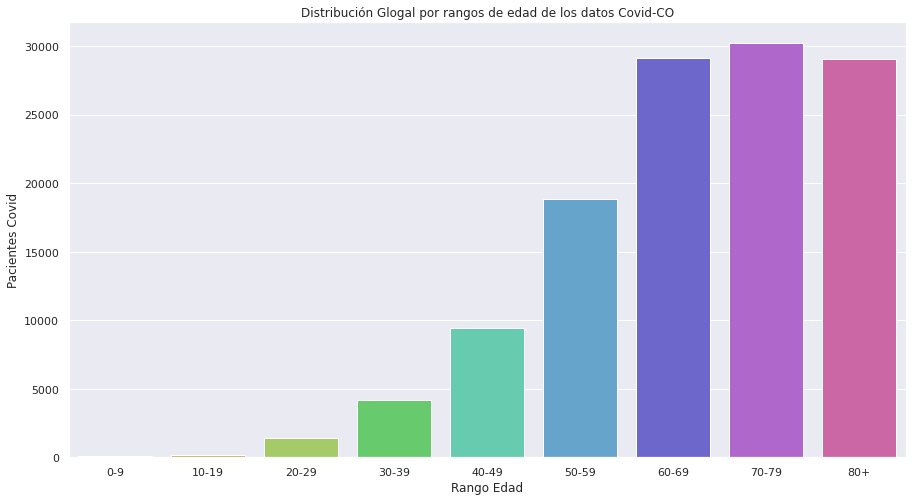

In [ ]:
sns.set_theme(style="darkgrid")
sns.set_palette("hls", 9)

plt.figure(figsize = (15,8))

g = sns.countplot(x="AgeGroup", data=df)
g.set( xlabel = "Rango Edad", ylabel = "Pacientes Covid")

plt.title("Distribución Glogal por rangos de edad de los datos Covid-CO")
plt.show()

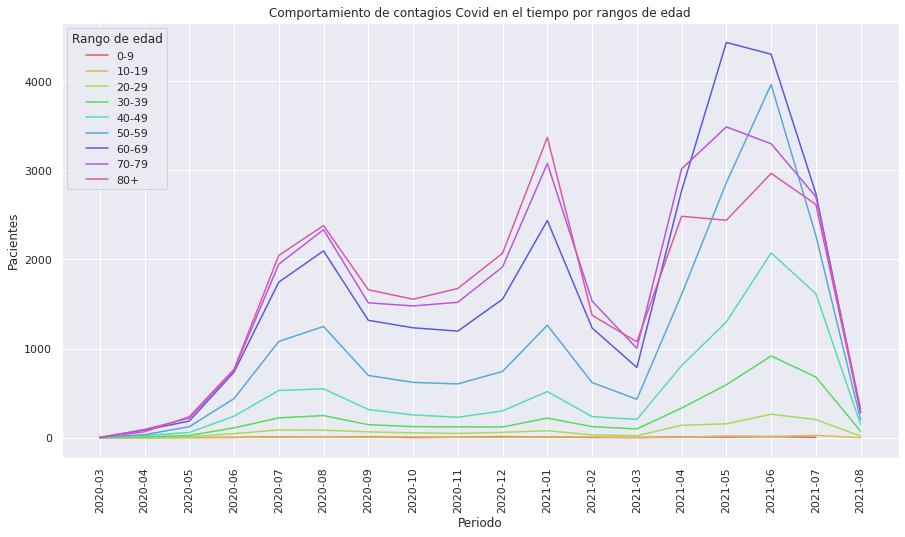

In [ ]:
plt.figure(figsize = (15,8))
sns.lineplot(data=df_cases_per_range, x='Periodo', y='Pacientes', hue='Rango de edad')
plt.title("Comportamiento de contagios Covid en el tiempo por rangos de edad")
plt.xticks(rotation=90)
plt.show()

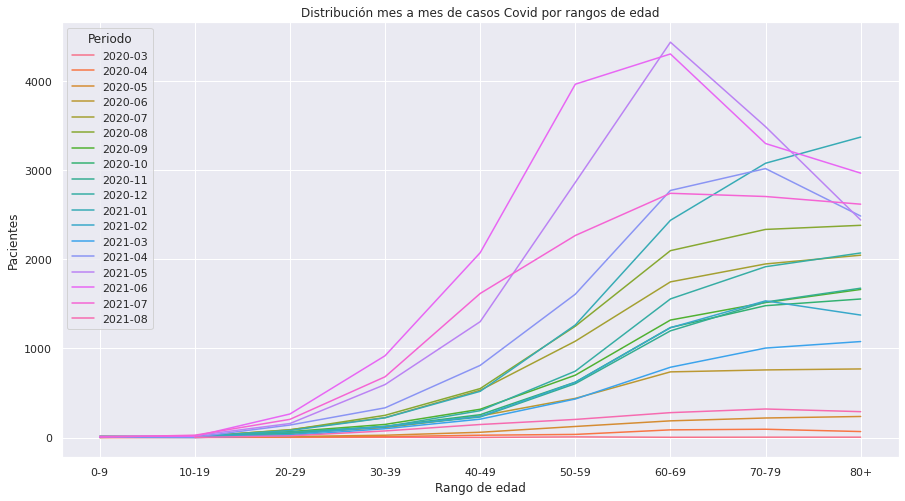

In [ ]:
plt.figure(figsize = (15,8))
sns.lineplot(data=df_cases_per_range, x='Rango de edad', y='Pacientes', hue='Periodo')
plt.title("Distribución mes a mes de casos Covid por rangos de edad")
plt.show()

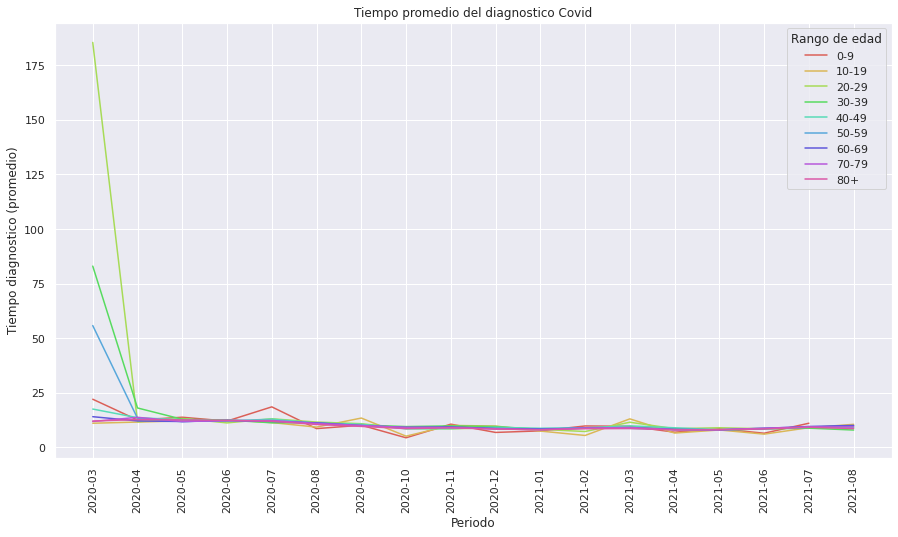

In [ ]:
plt.figure(figsize = (15,8))
sns.lineplot(data=df_diagnosis_duration, x='Periodo', y='Tiempo diagnostico (promedio)', hue='Rango de edad')
plt.xticks(rotation=90)
plt.title("Tiempo promedio del diagnostico Covid")
plt.show()
#Corte en marzo  y empezar a analizar en Abril 

#Future work Notes 



*   Correlate data from late diagnosis vs death
*   Publish the notebook in github
*   Share notebook with Alverio
*   Analysis about data spike in March
*   Analysis by Departamento and Municipio
 


**Nice to have**

https://lost-stats.github.io/Presentation/Figures/line_graph_with_labels_at_the_beginning_or_end.html


